In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data_week4/classification.csv')

In [2]:
data.head(5)

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [15]:
data['success'] = data['success'].astype(int)
data.head(5)

,age,interest,success
0,23.657801,18.859917,0
1,22.573729,17.969223,0
2,32.553424,29.463651,0
3,6.718035,25.704665,1
4,14.401919,16.770856,0


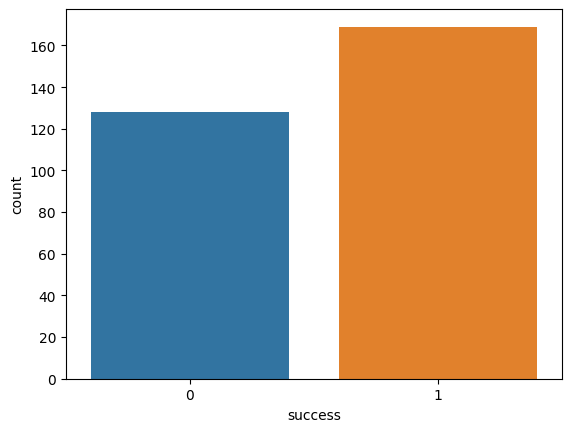

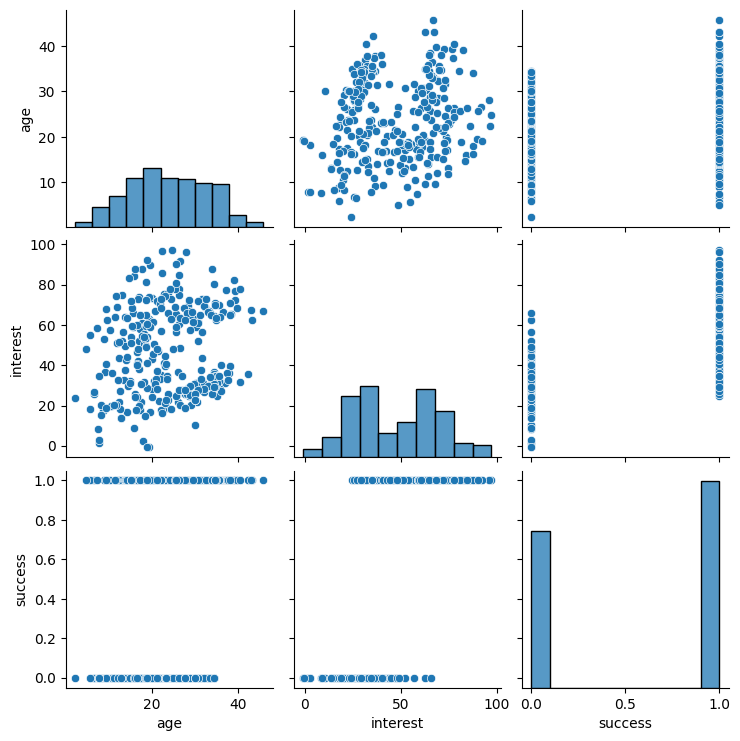

In [16]:
import seaborn as sns
sns.countplot(x=data['success'])
sns.pairplot(data)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'interest'}>],
       [<Axes: title={'center': 'success'}>, <Axes: >]], dtype=object)

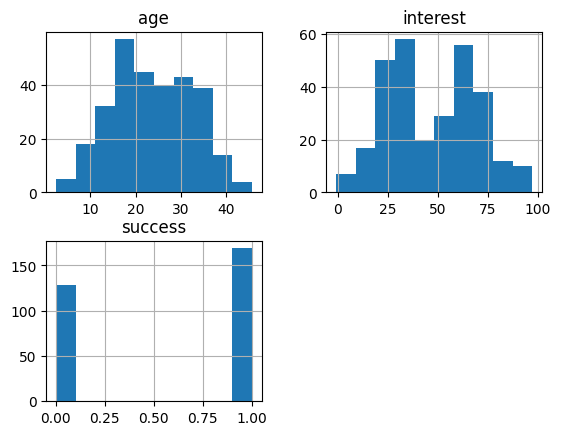

In [17]:
import matplotlib as plt
data.hist()

               age  interest   success
age       1.000000  0.142876  0.173307
interest  0.142876  1.000000  0.760703
success   0.173307  0.760703  1.000000


<Axes: >

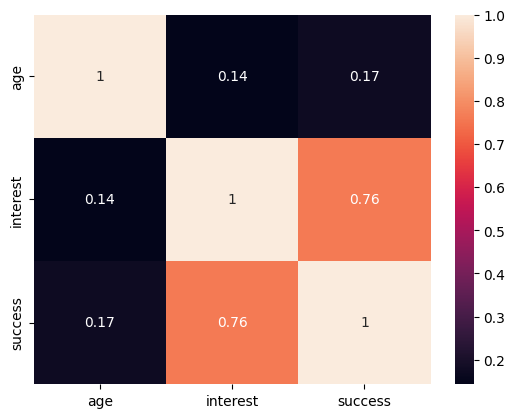

In [18]:
correlation = data.corr()
print(correlation)
sns.heatmap(correlation, annot = True)

In [19]:
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 

In [20]:
x = data.loc[:,['age','interest']]
y = data.loc[:,['success']]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [22]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [23]:
model = Perceptron(max_iter=100, eta0=0.05, random_state=0)
model.fit(x_train, y_train)
print('Accuray rate of pre-scaled model:',model.score(x_test, y_test))
x1=[[46,5.57686],[65,15.4682]]
y1= model.predict(x1)
print(y1)

Accuray rate of pre-scaled model: 0.7777777777777778
[0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


In [24]:
model = Perceptron(max_iter=100, eta0=0.05, random_state=0)
model.fit(x_train_std, y_train)
print('Accuray rate of post-scaled model:',model.score(x_test_std, y_test))
x2=[[46,5.57686],[65,15.4682]]
y2= model.predict(x2)
print(y2)

Accuray rate of post-scaled model: 0.8111111111111111
[1 1]


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
